### Competencias

* Entender el problema de la "maldición de la dimensionalidad" y sus implicancias para el modelo. 
* Conocer la aproximación psicométrica del Principal Component Analysis y el Análisis Factorial.

#### Introducción

A lo largo de esta unidad conoceremos y emplearemos algunas técnicas de aprendizaje no-supervisado. 
Por esto hacemos referencia a la ausencia de información previa sobre los atributos y/o del vector objetivo. 
Cuando trabajamos desde esta perspectiva, hablamos de "dimensiones latentes" como atributos existentes pero no medibles.

Dos ejemplos de aprendizaje no-supervisado pueden ser las disciplinas de reducción de dimensionalidad y clustering.
Hablamos de técnicas de reducción de dimensionalidad cuando el objetivo es minimizar una gran cantidad de atributos en una serie de 
dimensiones sustancialmente menores.

Las técnicas de clustering buscan agrupar los puntos en distintos conjuntos de datos dado reglas de similitud o diferencias.

#### Maldición de la Dimensionalidad
Los algoritmos que implementamos operan en un número finito de dimensiones que se establecen en una serie de espacios d-dimensionales, 
un problema en varias áreas relacionadas a las que estamos estudiando surge cuando este número de dimensiones aumenta mucho en comparación 
con la cantidad de ejemplos, al aumentar la dimensionalidad en la que se representan los datos el “volumen” del espacio aumenta de forma 
exponencial ya que la cantidad de combinaciones posibles entre los valores que pueden tomar las dimensiones (columnas) de los ejemplos de 
la muestra es mucho mayor a la cantidad de ejemplos en la misma, por lo tanto, puntos en este espacio hiperdimensional estarán dispersos 
(manteniendo en nuestro ejemplo siempre una cantidad constante de ejemplos en la muestra). Este fenómeno se conoce como la maldición de la
dimensionalidad.

El problema es que la convergencia de cualquier estimador al parámetro verdadero de una función definida en un espacio d-dimensional es 
muy lento dado al exceso de atributos y falta de observaciones. Ejemplifiquemos la distancia entre puntos cuando aumentamos la cantidad 
de dimensiones. Para ello implementamos la función sim_distance.

La función simula una serie finita de 1000 puntos aleatorios en un cubo y estima sus distancias. Evaluaremos la función cuando tenemos 
2, 10, 100 y 1000 atributos. La función retorna un histograma de la distancia y la recta roja señala la media de la distancia. En la
medida que aumentamos artificialmente la cantidad de dimensiones, la distancia promedio entre dos puntos aumenta substancialmente.



In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import factor_analyzer as factor
import missingno as msngo
import scipy.stats as stats
import seaborn as sns
import lec7_graphs as gfx
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

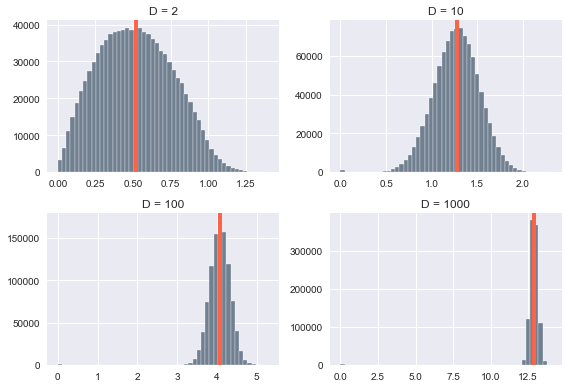

In [83]:
for i, e in enumerate([2, 10, 100, 1000]):
        plt.subplot(2,2, i+1)
        gfx.sim_distance(e)
        plt.tight_layout()


Digresión: Bendiciones de la dimensionalidad

No todo lo asociado con la dimensionalidad es negativo. Donoho (2000) sugiere que un
problema a investigar con más dimensiones que observaciones permite concentrar las
mediciones en dimensiones que capturen distintos aspectos de los atributos.

Trabajando con la dimensionalidad

Existen dos escuelas de análisis frente a la dimensionalidad. Una escuela psicométrica,
enfocada en la identificación de "factores causales" condicionales a un conjunto d >> n de
datos. La otra escuela, más cercana a las ciencias de la computación busca redimensionar
los factores latentes mediante la maximización de la varianza.

Análisis Factorial: La visión psicométrica

El análisis factorial busca extraer información sobre la variabilidad del conjunto finito de
variables, y transformarla en una serie de factores latentes (o no-observables
empíricamente). Para ello, el análisis busca la variación conjunta de dos variables en
respuesta a un factor específico. Las variables observadas se modelan como una
combinación lineal de los factores y errores.

Si deseamos analizar cómo una serie de variables observadas X están asociadas de forma
lineal a una cantidad finita de factores f, empleamos el siguiente sistema de ecuaciones.

$$ X_1 = \lambda_{10} + \lambda_{11}f_1 + ... \lambda_{k}f_k + \epsilon_1 $$
$$ X_1 = \lambda_{20} + \lambda_{21}f_1 + ... \lambda_{2k}f_k + \epsilon_2 $$
$$\vdots$$
$$ X_n = \lambda_{n} + \lambda_{n}f_1 + ... \lambda_{nk}f_k + \epsilon_n $$

Donde λ representa la carga asociada a la combinación lineal y ε representa el error en la
medición del constructo.

#### Implementando un análisis de factores con factor_analyzer
A lo largo de esta sección, trabajaremos con una encuesta del Centro de Estudios Públicos
realizada en Junio del 2003. Parte de la batería de preguntas está asociada a preguntas
sobre el nivel de confianza institucional.

Las preguntas se refieren la evaluación en una serie de instituciones de la sociedad civil, tales como:

* p17_a: La Iglesia Católica.
* p17_b: La Iglesia Evangélica.
* p17_c: Las Fuerzas Armadas.
* p17_d: Los Tribunales de Justicia.
* p17_e: La Prensa Escrita.
* p17_f: La Televisión.
* p17_g: Los Sindicatos.
* p17_h: Los Carabineros.
* p17_i: El Gobierno.
* p17_j: Los Partidos Políticos.
* p17_k: El Congreso.
* p17_l: Las Empresas.
* p17_m: Las Universidades.
* p17_n: La Radio.

Cada una de estas preguntas se evaluó en una escala entre 1 (Mucha Confianza), 2
(Bastante Confianza), 3 (No Mucha Confianza), 4 (Ninguna Confianza). Las categorías 8 (No
sabe), 9 (No contesta) representan valores perdidos.
Para implementar un análisis factorial en Python, utilizaremos la librería factor_analyzer.

Hay una característica no menor del análisis factorial: las variables deben compartir la
misma escala. Para este ejemplo no es un problema mayor, dado que emergen de un diseño
estadístico deliberado y las variables contienen una estructura coherente. Aún así,
podríamos estar ante la eventualidad de variables en distintas escalas. Una alternativa
viable es estandarizar todas las variables a incorporar en el análisis factorial.

Digresión: Estandarizando un conjunto de variables
Ante la eventualidad de estandarizar, la opción más viable es mapear una función a lo largo
del conjunto de variables. Esto se puede lograr con:
df.loc[:, 'conjunto':'variables'].applymap(lambda x: stats.zscore(x))


In [84]:
df = pd.read_csv('datasets/cep45.csv')
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [85]:
df.shape

(1503, 188)

In [87]:
df.describe()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,752.000000,753.267465,150.953426,9.187625,6.913506,7.504325,7.936793,2.489022,2.048570,1.913506,...,2.131071,2.108450,1.924817,2.064538,2.137725,18.617432,4.061876,3.489687,1.139055,1.000000
std,434.023041,434.827153,86.900408,3.747622,4.805730,5.853273,6.943705,0.899611,1.372998,1.258462,...,0.984967,0.999108,1.089993,1.024578,0.999498,30.589297,2.053098,0.837531,0.346119,0.189577
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.659186
25%,376.500000,376.500000,76.000000,6.000000,3.000000,5.000000,5.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,3.000000,3.000000,1.000000,0.782461
50%,752.000000,754.000000,151.000000,9.000000,6.000000,7.000000,7.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,4.000000,4.000000,1.000000,1.037718
75%,1127.500000,1129.500000,226.000000,13.000000,10.000000,10.000000,10.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,10.500000,5.000000,4.000000,1.000000,1.157864
max,1503.000000,1505.000000,301.000000,13.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,17.000000,5.000000,2.000000,1.446977


Nuestro objetivo es pre procesar y analizar la batería de preguntas asociadas a la confianza
institucional. Para ello nos enfocaremos en el comportamiento empírico de las variables y
en las tasas de valores perdidos.

Dado que trabajaremos de manera reiterada con este conjunto, una buena práctica es
separarlo en un nuevo objeto. Ya sabemos cómo segmentar columnas con loc, ahora lo
haremos con filter. Dentro de los argumentos de filter implementaremos la opción
regex, que emplea expresiones regulares para encontrar patrones comunes entre strings.

Para este caso emplearemos un asterisco como comodín.
Con nuestra batería seleccionada, grafiquemos el comportamiento de las respuestas
utilizando iteritems() como un orientador del loop. Se observa que a lo largo de todas las
preguntas las tasas de no respuesta son bajas, no superando el 1% del total de las
observaciones.


In [89]:
trust_df = df.filter(regex="p17_*")

In [90]:
trust_df.sample()

,p17_a,p17_b,p17_c,p17_d,p17_e,p17_f,p17_g,p17_h,p17_i,p17_j,p17_k,p17_l,p17_m,p17_n
41,3,1,3,3,1,1,4,3,3,3,4,3,3,2


In [102]:
# filtramos las columnas
trust_df = trust_df.rename(columns = {'p17_a': 'I.Catolica', 'p17_b':
                                        'I.Evangelica', 'p17_c': 'FFAA', 'p17_d': 'Justicia',
                                        'p17_e': 'Prensa', 'p17_f': 'Television',
                                        'p17_g':'Sindicatos', 'p17_h':'Carabineros',
                                        'p17_i': 'Gobierno', 'p17_j': 'PartidosPol',
                                        'p17_k': 'Congreso', 'p17_l':'Empresas',
                                        'p17_m':'Universidades', 'p17_n':'Radio'})


In [104]:
trust_df.head()

,I.Catolica,I.Evangelica,FFAA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,PartidosPol,Congreso,Empresas,Universidades,Radio
0,2,4,3,2,3,3,3,4,3,3,2,3,2,2
1,2,3,3,3,3,3,2,2,3,4,3,3,3,3
2,4,4,4,4,3,3,4,4,4,4,4,3,4,2
3,1,3,2,2,3,2,3,3,3,4,3,3,3,3
4,3,3,2,1,2,2,1,1,2,3,2,2,2,2


In [101]:
def fetch_missing(df, missing_vals = [8, 9]):
        for colname, serie in df.iteritems():
                print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

fetch_missing(trust_df)

I.Catolica 0.03
I.Evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
PartidosPol 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


La función matrix dentro de la librería missingno permite visualizar la matriz de datos, las
líneas en blanco representan respuestas perdidas (o negadas) por el encuestado. De
manera similar a lo entregado por nuestra función fetch_missing, las preguntas con
mayores niveles de perdidos son p17_b (La Iglesia Evangélica), p17_g (Los Sindicatos),
p17_m (Las Universidades).

Esperamos que estas variables presenten cargas bajas en los factores. Este punto será
retomado posteriormente.


<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

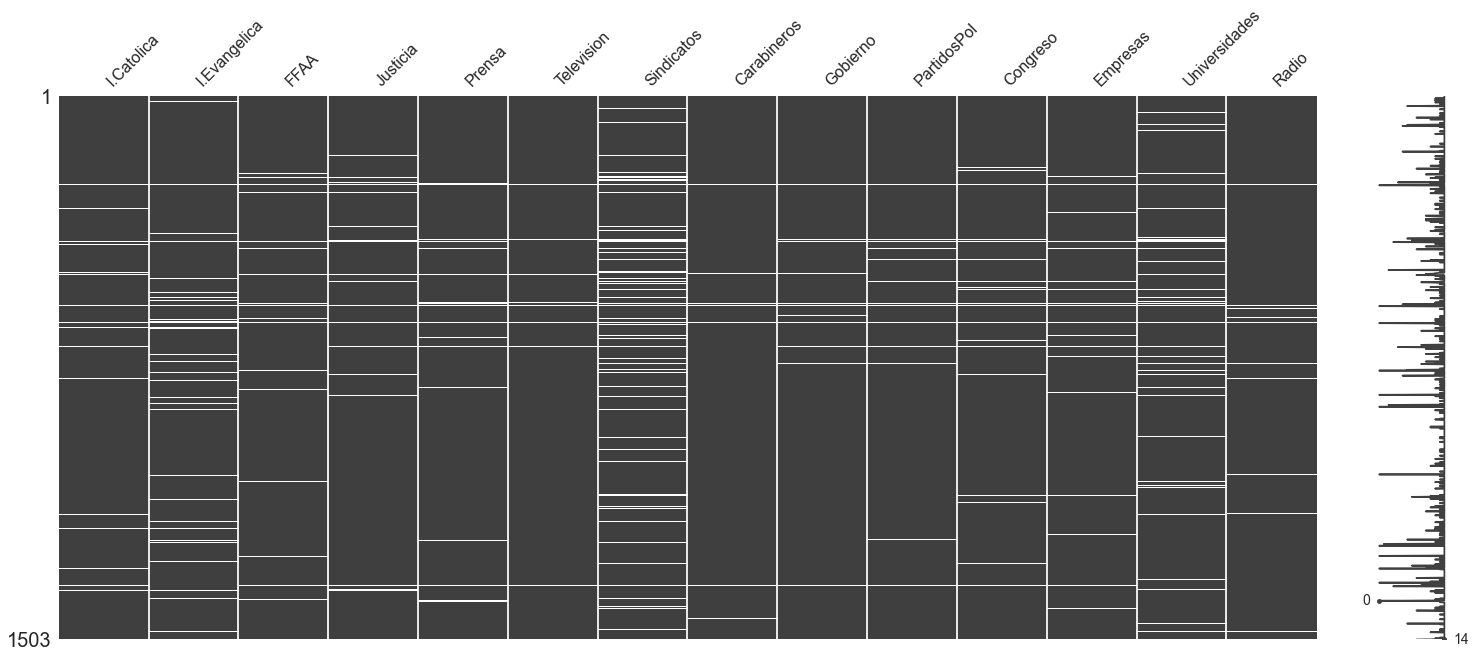

In [93]:
plt.figure(figsize=(4,4))
msngo.matrix(trust_df.replace([8, 9], [np.nan, np.nan]))


Una vez analizado el patrón de datos perdidos, optamos por eliminarlos y procedemos a
inspeccionar las medias de cada variable en la batería de preguntas mediante un dotplot.

In [100]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable, mean = [], []
# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in trust_df.iteritems():
        # guardamos el nombre en 
        variable.append(colname)
        # calculamos y procesamos la media
        mean.append(serie.mean())

tmp_df = pd.DataFrame({'var':variable, 'mean':mean}).sort_values(by = ['mean'])

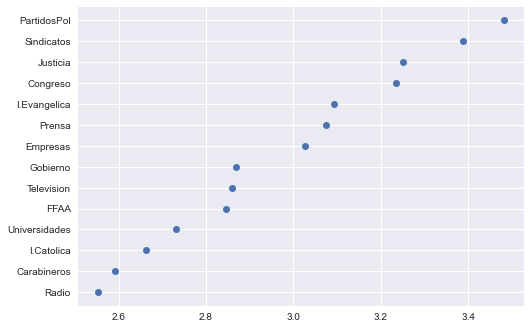

In [97]:
plt.plot(tmp_df['mean'], tmp_df['var'], 'o')

Recordemos que valores más altos en la escala de confianza significa que la sociedad
confía menos en las instituciones. En un extremo observamos a instituciones de carácter
político como los Partidos Políticos, los Tribunales de Justicia, el Congreso y los Sindicatos.
En el otro extremo encontramos a instituciones "cotidianas", aquellas que presentan un
mayor grado de interacción con las personas como los Carabineros, la Iglesia Católica y la
Radio. Esto entrega indicios sobre dos grupos de instituciones.

Antes de modelar los factores latentes de nuestro modelo, es necesario realizar un par de
pruebas sobre la idoneidad de nuestra matriz de datos para extraer factores. Las pruebas de
esfericidad de Barlett y de muestreo de Kaiser-Meyer-Olkin entregan información sobre el
grado de covarianza entre variables en la batería de preguntas. Si nos encontramos ante
casos donde las cargas en la matriz de covarianza son bajas y/o responden a otras
estructuras de datos, es preferible implementar otros enfoques que escapan a los objetivos
del curso.

#### Prueba de esfericidad de errores de Bartlett

Debemos preguntarnos si nuestra matriz de correlaciones entre los atributos es o no una
matriz de identidad (matriz donde la diagonal principal es de 1 y los triángulos superiores e
inferiores son 0), de ocurrir eso estaríamos viendo columnas completamente
perpendiculares entre sí, por lo tanto, no comparten información en común . Un supuesto
clave sobre la estructura de nuestra matriz de datos y que requerimos para justificar el
proceso de extracción de factores latentes es que parte de la varianza de nuestras variables
sea común entre ellas (o al menos entre algunas de ellas).
En esta prueba, la hipótesis nula es que la matriz de correlaciones entre las variables de
nuestra matriz es una matriz identidad, mientras que la hipótesis alternativa es que esta es
distinta a una identidad. De manera similar a las otras pruebas de estadísticos de ajuste, si
encontramos evidencia para fallar en rechazar la hipótesis nula con un cierto grado de
confianza (90%, 95% o 99%, por ejemplo), la prueba concluye que la matriz sigue una
distribución multivariada normal, no una matriz de identidad, por lo que se puede proceder
con el análisis de factores.
Para implementar la prueba dentro de Python, utilizamos el método
calculate_bartlett_sphericity de la librería factor_analyzer en nuestra batería de
preguntas. La prueba retorna el valor del estadístico de contraste chi-square y un p-value
asociado a ese estadístico. En este caso, la prueba de esfericidad sugiere que la matriz de
correlaciones no es igual a la matriz de identidad con un grado suficientemente alto de
1 La razón por la que la diagonal principal de esa matrix estaría compuesta por unos mientras
que las matrices triangulares superior e inferior son nulas, es porque esto significa que cada
par de variables tienen correlación de 0 entre sí, sin embargo, una variable tiene correlación de
1 consigo misma confianza (de hecho tan pequeño fue el pvalor que se nos entregó aproximado simplemente
a 0.0), por lo que se puede seguir con el análisis.
.


In [106]:
factor.calculate_bartlett_sphericity(trust_df)

(6630.891612219067, 0.0)

#### Prueba de muestreo Kaiser-Meyer-Olkin (KMO)

De manera adicional a la prueba de Bartlett, podemos medir si las correlaciones parciales
dentro de la matriz son cercanas a 0. De ser este el caso, la prueba sugiere la existencia de
por lo menos un factor latente dentro de la batería de preguntas.

Se puede implementar mediante el método calculate_kmo de la librería factor_analyzer.
El método devuelve el puntaje KMO para cada ítem dentro de la batería, así como un puntaje
global para todos los items.

Se sugiere que para seguir con el análisis factorial, el KMO debe presentar valores
superiores a .7. En este caso se satisface el punto y podemos proseguir.

Ante el caso en que encontremos puntajes bajos, la estructura a estimar se puede mejorar al
eliminar los ítems con cargas KMO inferiores al puntaje de corte.

La eliminación de estos ítems permite liberar la matriz de elementos inestables que
dificulten la identificación de los factores a extraer.


In [107]:
factor.calculate_kmo(trust_df)

(array([0.93861106, 0.92726637, 0.93185239, 0.9529143 , 0.91981398,
        0.88566125, 0.93679868, 0.9113125 , 0.93989144, 0.91301888,
        0.91937924, 0.94242112, 0.95184539, 0.93229633]),
 0.9275552166414565)

#### Estimando la cantidad de factores a extraer
Posterior al análisis de la idoneidad de nuestra matriz de datos para el análisis factorial, la
siguiente pregunta a responder es ¿qué tantos factores necesitamos?

Para ello podemos analizar los valores propios (eigenvalues) de la descomposición de la
matriz. Estos informan qué tanta varianza se puede atribuir un factor en específico.
Mediante la definición de qué tantos factores necesitamos para caracterizar una matriz
podemos obtener una estructura parsimoniosa e interpretable.

La manera más simple de analizar esto es mediante un scree plot, que visualiza los
eigenvalues en la medida que se aumenta la cantidad de factores. Por convención no
pueden existir más factores que variables dentro de la matriz.

Comencemos por implementar un modelo con factor_analyzer.
* Nuestro objeto instanciado, podemos implementar el análisis con
factorize.analyze. El primer parámetro (data) que debe ser ingresado es la
matriz a descomponer. El segundo parámetro (n_factors) es la cantidad de
factores a extraer. Por último, method hace referencia a la rotación aplicada en la
matriz de cargas. Implementaremos la estrategia más simple conocida como
varimax.

* Con las cargas λ podemos estimar una matriz de covarianza Λ para calcular la matriz
de covarianza observable. Asumiendo el cumplimiento de los supuestos, se asume
que Λ es un buen aproximado de la covarianza observable.

* Por lo general empleamos Análisis de Componentes Principales para estimar la
comunalidad total de la matriz.

* Las cargas λ no tienen una identificación única, por lo que se puede emplear una
"rotación" de la matriz para encontrar una mejor estructura latente. Están los
métodos ortogonales (que no permiten correlación entre factores) y oblicuos (que sí
permiten correlación entre factores). Algunas de las más utilizadas son:
  * Varimax: Rotación que busca maximizar la varianza de las cargas para cada factor.
  * Quartimax: Rotación que busca maximizar la varianza de las cargas y tiende a producir cargas más altas para cada variable.

* Para generar el scree plot, extraemos los eigenvalues reportados en
factorize.get_eigenvalues()[0] y los graficamos contra la cantidad de factores
estimables.

#### Extraccion de valores latentes

Se debe indicar la cantida de factores al instanciar la clase, y el metodod e rotacion en el atributo "rotation"

In [112]:
factorize = factor.FactorAnalyzer(rotation = 'varimax')

Se debe llamar al metodo .fit, pasando como argumento el set de datos

In [113]:
factorize.fit(trust_df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

Se pueden obtener los eigenvalues accediendo al metodo get_eigenvalues()

In [114]:
factor_eigenvalues = factorize.get_eigenvalues()[0]
factor_eigenvalues

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

#### Valores propios asociados a cada factor

Al momneto de graficar, debemos asignar en el eje x una lista o arreglo de valores de 1 a n la cantidad de valores propios obtenidos. Y en el eje y los valores propios obtenidos

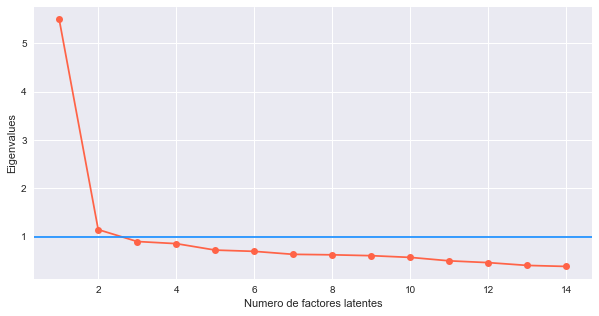

In [116]:
plt.figure(figsize = (10, 5))
plt.plot(np.arange(1, len(factor_eigenvalues) + 1), factor_eigenvalues, 'o-', color = 'tomato')
plt.xlabel('Numero de factores latentes')
plt.ylabel('Eigenvalues')
plt.axhline(1, color = 'dodgerblue')

Ajustar la cantida de factores extraidos.

Se actualiza la cantidad de factores extraidos y se aplica .fit() para reentrenar

In [117]:
factorize_dos = factor.FactorAnalyzer(n_factors = 2, rotation = 'varimax')
factorize_dos.fit(trust_df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [118]:
factorize_dos.get_eigenvalues()[0]

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

In [119]:
factorize_dos.loadings_

array([[0.2115378 , 0.48207631],
       [0.18909242, 0.31556017],
       [0.44635957, 0.4410592 ],
       [0.49501859, 0.36986145],
       [0.39299559, 0.50611705],
       [0.20838918, 0.7000665 ],
       [0.50838434, 0.18316639],
       [0.24972885, 0.5685152 ],
       [0.51311237, 0.45708089],
       [0.66688535, 0.28831161],
       [0.72624282, 0.21479004],
       [0.56733533, 0.31276563],
       [0.44188951, 0.33202866],
       [0.24208804, 0.57256938]])

In [120]:
factorize_dos.loadings_.shape

(14, 2)

In [125]:
loudings_df = pd.DataFrame(factorize_dos.loadings_, columns = {'Factor_1', 'Factor_2'}, index = trust_df.columns)
loudings_df

,Factor_1,Factor_2
I.Catolica,0.211538,0.482076
I.Evangelica,0.189092,0.315560
FFAA,0.446360,0.441059
Justicia,0.495019,0.369861
Prensa,0.392996,0.506117
Television,0.208389,0.700067
Sindicatos,0.508384,0.183166
Carabineros,0.249729,0.568515
Gobierno,0.513112,0.457081
PartidosPol,0.666885,0.288312


<AxesSubplot:>

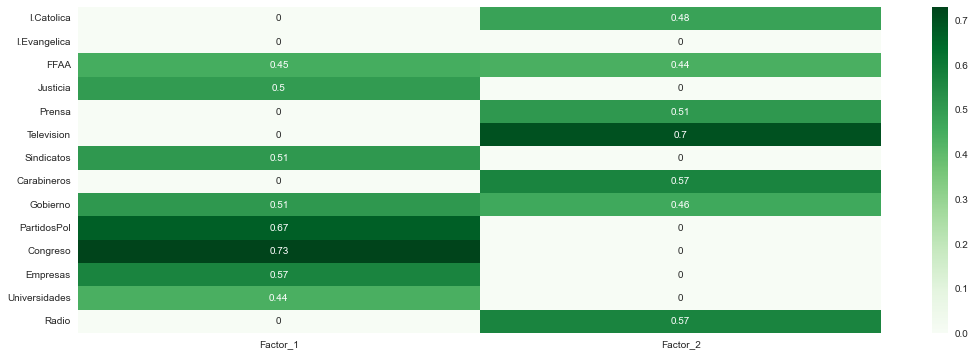

In [126]:
plt.figure(figsize = (18, 6))
factor_loudings = loudings_df.applymap(lambda x: np.where(x < .4, 0, round(x, 2)))
sns.heatmap(factor_loudings, cmap = 'Greens', annot = True)

Visualizacion de cargas factoriales para cada variable.

Podemos destacar aquellas cargas que tengan una magnitud sobre un cierto umbral fijado por nosotros

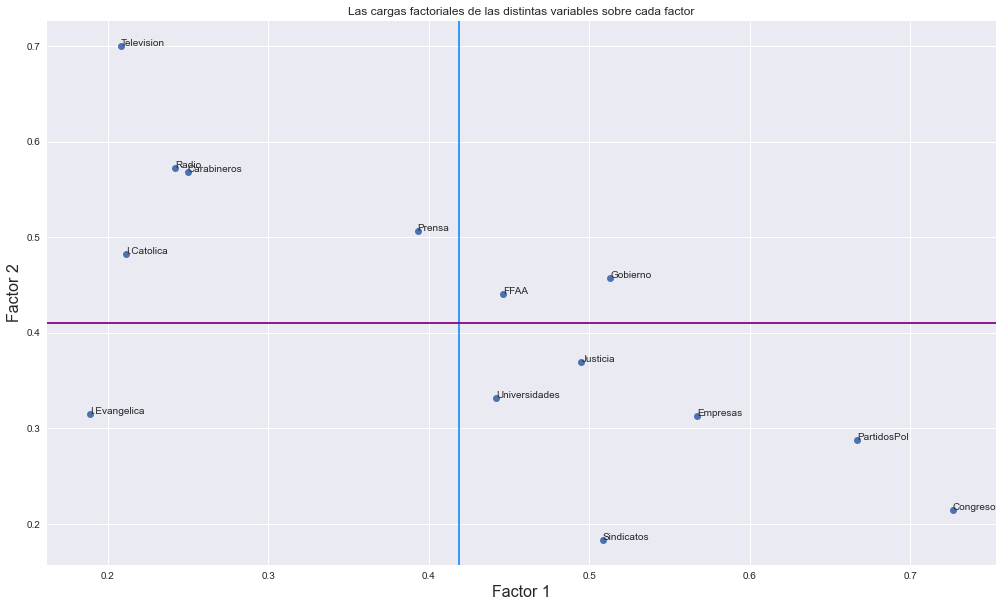

In [128]:
plt.figure(figsize = (17, 10))
plt.plot(loudings_df.Factor_1, loudings_df.Factor_2, 'o')
plt.xlabel('Factor 1', size = 16)
plt.ylabel('Factor 2', size = 16)
plt.title('Las cargas factoriales de las distintas variables sobre cada factor')

for i, text in enumerate(loudings_df.index):
        plt.annotate(text, (loudings_df['Factor_1'][i], loudings_df['Factor_2'][i]))

plt.axvline(loudings_df['Factor_1'].mean(), color = 'dodgerblue')
plt.axhline(loudings_df['Factor_2'].mean(), color = 'purple')

Varianza explicada por los factores

In [129]:
factor_var = factorize_dos.get_factor_variance()
df_fv = pd.DataFrame(factor_var, columns = ['Factor_1', 'Factor_2'], index = ['Sun of square loadings (variance)', 'Proportional variance', 'Cumulative variance'])
df_fv

,Factor_1,Factor_2
Sun of square loadings (variance),2.854667,2.640396
Proportional variance,0.203905,0.188600
Cumulative variance,0.203905,0.392504


In [130]:
scores = factorize_dos.transform(trust_df)
scores

array([[-0.67809168,  0.33784116],
       [-0.04809729, -0.00985878],
       [ 0.54219961,  0.42465026],
       ...,
       [-0.22806842,  0.13539122],
       [-0.03749916, -0.04883833],
       [ 4.13069654, -0.00732222]])

In [131]:
scores.shape

(1503, 2)